**LÊ VĂN LỢI-Viettel IDC-DA**

Import Libs

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
import pandas.plotting
import math
%matplotlib inline

In [10]:
from keras.models import Sequential
from keras.layers import Dense

Load data

In [12]:
data = pd.read_csv('bank.csv',sep = ';')  
# Display
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Miêu tả data

In [13]:
data.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
data['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [16]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week', 'poutcome']
numerical = [x for x in data.columns.to_list() if x not in categorical]
numerical.remove('y')

In [17]:
print('Categorical data:', categorical)
print('Numerical data:', numerical)

Categorical data: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical data: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


Import thư viện ML

In [18]:
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
import seaborn as sns
import missingno #find missing data
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from scipy.stats import randint as sp_randint
import datetime
import xgboost as xgb
from xgboost import XGBClassifier

%matplotlib inline

In [19]:
data = data.replace('unknown', np.nan)

In [20]:
data.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Điền dữ liệu trống

In [21]:
data['job'] = data['job'].fillna(data['job'].mode()[0])
data['marital'] = data['marital'].fillna(data['marital'].mode()[0])
data['education'] = data['education'].fillna(data['education'].mode()[0])
data['default'] = data['default'].fillna(data['default'].mode()[0])

data['housing'] = data['housing'].fillna(data['housing'].mode()[0])




In [22]:
numerical_variables = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
data[numerical_variables].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [23]:
data['y'].replace({"no":0, "yes":1}, inplace=True)

In [33]:
Mean_encoded_job = data.groupby(['job'])['y'].mean().to_dict()   
data['job'] =  data['job'].map(Mean_encoded_job)  

Mean_encoded_marital = data.groupby(['marital'])['y'].mean().to_dict()   
data['marital'] =  data['marital'].map(Mean_encoded_marital) 

Mean_encoded_default = data.groupby(['default'])['y'].mean().to_dict()   
data['default'] =  data['default'].map(Mean_encoded_default)

Mean_encoded_housing = data.groupby(['housing'])['y'].mean().to_dict()   
data['housing'] =  data['housing'].map(Mean_encoded_housing)

Mean_encoded_loan = data.groupby(['loan'])['y'].mean().to_dict()   
data['loan'] =  data['loan'].map(Mean_encoded_loan)

Mean_encoded_contact = data.groupby(['contact'])['y'].mean().to_dict()   
data['contact'] =  data['contact'].map(Mean_encoded_contact)

Mean_encoded_month = data.groupby(['month'])['y'].mean().to_dict()   
data['month'] =  data['month'].map(Mean_encoded_month)

Mean_encoded_poutcome = data.groupby(['poutcome'])['y'].mean().to_dict()   
data['poutcome'] =  data['poutcome'].map(Mean_encoded_poutcome)

Mean_encoded_day_of_week = data.groupby(['day_of_week'])['y'].mean().to_dict()   
data['day_of_week'] =  data['day_of_week'].map(Mean_encoded_day_of_week)

Mean_encoded_education = data.groupby(['education'])['y'].mean().to_dict()   
data['education'] =  data['education'].map(Mean_encoded_education)

In [34]:
data_drop = pd.DataFrame()
data_drop = data

In [35]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  float64
 2   marital         41188 non-null  float64
 3   education       41188 non-null  float64
 4   default         41188 non-null  float64
 5   housing         41188 non-null  float64
 6   loan            40198 non-null  float64
 7   contact         41188 non-null  float64
 8   month           41188 non-null  float64
 9   day_of_week     41188 non-null  float64
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  float64
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [36]:
data_drop.fillna(data_drop.mean(), inplace = True)

In [37]:
data_drop.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.100000,0.101727,0.102490,0.112662,0.108796,0.113402,0.052313,0.064347,0.099483,261,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0.081381,0.101727,0.108355,0.112662,0.108796,0.113402,0.052313,0.064347,0.099483,149,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0.081381,0.101727,0.108355,0.112662,0.115838,0.113402,0.052313,0.064347,0.099483,226,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.129185,0.101727,0.082024,0.112662,0.108796,0.113402,0.052313,0.064347,0.099483,151,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0.081381,0.101727,0.108355,0.112662,0.108796,0.109315,0.052313,0.064347,0.099483,307,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0


**ANN_1**

In [98]:
model = Sequential()
model.add(Dense(12, input_dim=20, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
std_scale = preprocessing.StandardScaler().fit(data_drop.drop('y', axis=1))
X = std_scale.transform(data_drop.drop('y', axis=1))
y = data_drop['y']

In [39]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from numpy import ravel
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train1, y_train1.values.ravel())

print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y Test:", y_test.shape)

X Train: (58508, 20)
X Test: (8238, 20)
Y Train: (58508,)
Y Test: (8238,)


In [101]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [102]:
history=model.fit(X_train, y_train, epochs=20, batch_size=16, shuffle=True)

Epoch 1/20
3657/3657 [==============================] - 20s 4ms/step - loss: 0.3093 - accuracy: 0.8758
Epoch 2/20
3657/3657 [==============================] - 13s 4ms/step - loss: 0.2661 - accuracy: 0.8946
Epoch 3/20
3657/3657 [==============================] - 13s 4ms/step - loss: 0.2579 - accuracy: 0.8978
Epoch 4/20
3657/3657 [==============================] - 13s 4ms/step - loss: 0.2533 - accuracy: 0.9004
Epoch 5/20
3657/3657 [==============================] - 13s 4ms/step - loss: 0.2502 - accuracy: 0.9019
Epoch 6/20
3657/3657 [==============================] - 13s 4ms/step - loss: 0.2478 - accuracy: 0.9023
Epoch 7/20
3657/3657 [==============================] - 15s 4ms/step - loss: 0.2461 - accuracy: 0.9038
Epoch 8/20
3657/3657 [==============================] - 13s 4ms/step - loss: 0.2444 - accuracy: 0.9038
Epoch 9/20
3657/3657 [==============================] - 13s 4ms/step - loss: 0.2430 - accuracy: 0.9053
Epoch 10/20
3657/3657 [==============================] - 13s 4ms/step - l

In [103]:
score = model.evaluate(X_test, y_test, verbose=0)

In [104]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2989276647567749
Test accuracy: 0.8605244159698486


dict_keys(['loss', 'accuracy'])


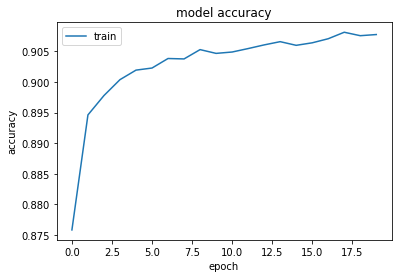

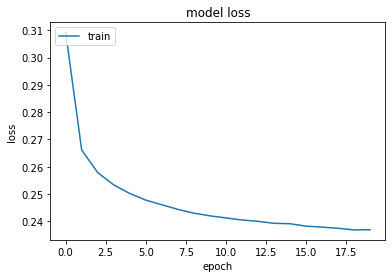

In [105]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

**ANN_2 Epoch =200, batch size=32**

In [107]:
# define the keras model
model1 = Sequential()
model1.add(Dense(12, input_dim=20, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [108]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
history1=model1.fit(X_train, y_train, epochs=200, batch_size=32, shuffle=True)

Epoch 1/200
1829/1829 [==============================] - 13s 6ms/step - loss: 0.3214 - accuracy: 0.8687
Epoch 2/200
1829/1829 [==============================] - 7s 4ms/step - loss: 0.2741 - accuracy: 0.8916
Epoch 3/200
1829/1829 [==============================] - 7s 4ms/step - loss: 0.2650 - accuracy: 0.8947
Epoch 4/200
1829/1829 [==============================] - 7s 4ms/step - loss: 0.2589 - accuracy: 0.8965
Epoch 5/200
1829/1829 [==============================] - 7s 4ms/step - loss: 0.2546 - accuracy: 0.8985
Epoch 6/200
1829/1829 [==============================] - 7s 4ms/step - loss: 0.2523 - accuracy: 0.8993
Epoch 7/200
1829/1829 [==============================] - 7s 4ms/step - loss: 0.2501 - accuracy: 0.9003
Epoch 8/200
1829/1829 [==============================] - 7s 4ms/step - loss: 0.2489 - accuracy: 0.9012
Epoch 9/200
1829/1829 [==============================] - 7s 4ms/step - loss: 0.2477 - accuracy: 0.9014
Epoch 10/200
1829/1829 [==============================] - 7s 4ms/step - 

In [110]:
score1 = model1.evaluate(X_test, y_test, verbose=0)

In [111]:
print('Test loss ANN_2', score1[0])
print('Test accuracy ANN_2:', score1[1])

Test loss ANN_2 0.2869773507118225
Test accuracy ANN_2: 0.8712065815925598


dict_keys(['loss', 'accuracy'])


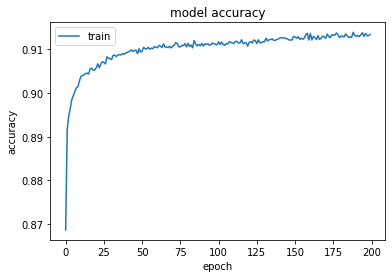

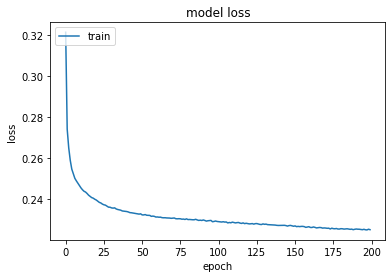

In [112]:
print(history1.history.keys())
#  "Accuracy"
plt.plot(history1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

**Các thuật toán ML**

In [40]:
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier,
                          )
                     )
                  ):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [41]:
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

**Logistic Regression**

In [50]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [51]:
# Random Search for Hyperparameters

def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 4.74 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.881 (std: 0.004)
Parameters: {'penalty': 'l2', 'intercept_scaling': 80.57320127630955, 'class_weight': None, 'C': 513536.1928705051}

Model with rank: 1
Mean validation score: 0.881 (std: 0.004)
Parameters: {'penalty': 'l2', 'intercept_scaling': 368855858.4697691, 'class_weight': 'balanced', 'C': 99655.17359035104}

Model with rank: 1
Mean validation score: 0.881 (std: 0.004)
Parameters: {'penalty': 'l2', 'intercept_scaling': 243690547.60272655, 'class_weight': None, 'C': 1.8282105156349413}

Model with rank: 4
Mean validation score: 0.833 (std: 0.003)
Parameters: {'penalty': 'l2', 'intercept_scaling': 3.842009689794773e-15, 'class_weight': None, 'C': 4.6726898610884074e-05}

Model with rank: 5
Mean validation score: nan (std: nan)
Parameters: {'penalty': 'l1', 'intercept_scaling': 2.5126963795609273e-19, 'class_weight': 'balanced', 'C': 1.0408825796200197e-06}



In [52]:
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 86.33
Accuracy CV 10-Fold: 88.05
Running Time: 0:00:04.662019


In [53]:
from sklearn.metrics import classification_report
print (metrics.classification_report(y_train, train_pred_log))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88     29254
           1       0.87      0.90      0.88     29254

    accuracy                           0.88     58508
   macro avg       0.88      0.88      0.88     58508
weighted avg       0.88      0.88      0.88     58508



In [54]:
print (metrics.classification_report(y_test, test_pred_log))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7294
           1       0.45      0.86      0.59       944

    accuracy                           0.86      8238
   macro avg       0.71      0.86      0.75      8238
weighted avg       0.92      0.86      0.88      8238



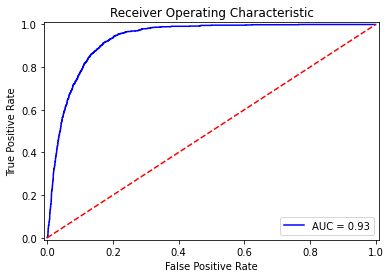

In [55]:
plot_roc_curve(y_test, probs_log)

**k-Nearest Neighbors**

AUC for k =  1 is 0.8223822371998346
AUC for k =  8 is 0.9060722360612158
AUC for k =  15 is 0.9177845413922752
AUC for k =  22 is 0.9217508266604081
AUC for k =  29 is 0.9230633606446905
AUC for k =  36 is 0.9253045805003416
AUC for k =  43 is 0.9263376881625484
AUC for k =  50 is 0.9275583629219281
AUC for k =  57 is 0.9276208126716642
AUC for k =  64 is 0.9274617836578009


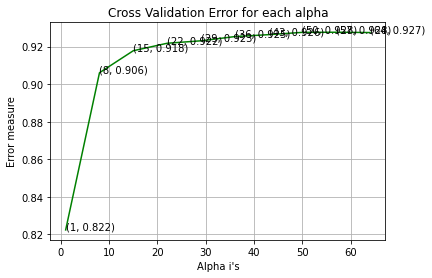

For values of best alpha =  57 The train AUC is: 0.9523113161400156
For values of best alpha =  57 The test AUC is: 0.9276208126716642


In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
%matplotlib inline

alpha = [x for x in range(1, 70, 7)]
cv_auc_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    cv_auc_array.append(roc_auc_score(y_test, predict_y[:,1]))
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])
best_alpha = np.argmax(cv_auc_array)
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

In [57]:
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors=alpha[best_alpha],
                                                                              n_jobs = -1), 
                                                                              X_train, 
                                                                              y_train, 
                                                                              X_test, 
                                                                              10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.55
Accuracy CV 10-Fold: 89.23
Running Time: 0:02:09.246441


In [58]:
print (metrics.classification_report(y_train, train_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     29254
           1       0.85      0.95      0.90     29254

    accuracy                           0.89     58508
   macro avg       0.90      0.89      0.89     58508
weighted avg       0.90      0.89      0.89     58508



In [59]:
print (metrics.classification_report(y_test, test_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7294
           1       0.40      0.90      0.56       944

    accuracy                           0.84      8238
   macro avg       0.69      0.86      0.73      8238
weighted avg       0.92      0.84      0.86      8238



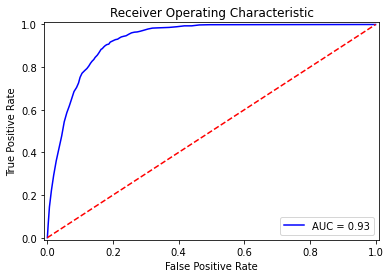

In [60]:
plot_roc_curve(y_test, probs_knn)

**Gaussian Naive Bayes**

In [61]:
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 39.41
Accuracy CV 10-Fold: 65.2
Running Time: 0:00:01.293168


In [62]:
print (metrics.classification_report(y_train, train_pred_gaussian))

              precision    recall  f1-score   support

           0       0.95      0.32      0.48     29254
           1       0.59      0.98      0.74     29254

    accuracy                           0.65     58508
   macro avg       0.77      0.65      0.61     58508
weighted avg       0.77      0.65      0.61     58508



In [63]:
print (metrics.classification_report(y_test, test_pred_gaussian))

              precision    recall  f1-score   support

           0       0.99      0.32      0.48      7294
           1       0.16      0.97      0.27       944

    accuracy                           0.39      8238
   macro avg       0.57      0.65      0.38      8238
weighted avg       0.89      0.39      0.46      8238



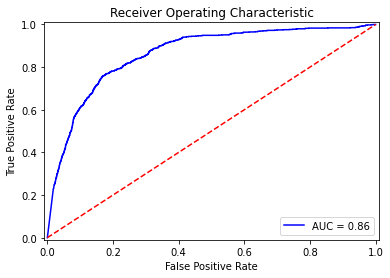

In [64]:
plot_roc_curve(y_test, probs_gau)

**Linear SVC**

In [65]:
start_time = time.time()
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, _ = fit_ml_algo(LinearSVC(),
                                                                                           X_train, 
                                                                                           y_train,
                                                                                           X_test, 
                                                                                           10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 86.13
Accuracy CV 10-Fold: 87.98
Running Time: 0:01:08.679806


In [68]:
print (metrics.classification_report(y_train, train_pred_svc))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88     29254
           1       0.87      0.90      0.88     29254

    accuracy                           0.88     58508
   macro avg       0.88      0.88      0.88     58508
weighted avg       0.88      0.88      0.88     58508



In [69]:
print (metrics.classification_report(y_test, test_pred_svc))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7294
           1       0.45      0.87      0.59       944

    accuracy                           0.86      8238
   macro avg       0.71      0.86      0.75      8238
weighted avg       0.92      0.86      0.88      8238



In [70]:
start_time = time.time()
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, _ = fit_ml_algo(SGDClassifier(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 86.04
Accuracy CV 10-Fold: 87.96
Running Time: 0:00:01.979493


**Decision Tree Classifier**

In [71]:
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 87.97
Accuracy CV 10-Fold: 92.42
Running Time: 0:00:03.680797


**Random Forest**

In [72]:
 Search for Hyperparameters
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 30),
              "min_samples_leaf": sp_randint(1, 20),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 35.96 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.937 (std: 0.018)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 7, 'min_samples_split': 23}

Model with rank: 2
Mean validation score: 0.935 (std: 0.023)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}

Model with rank: 3
Mean validation score: 0.931 (std: 0.015)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 13, 'min_samples_split': 20}

Model with rank: 4
Mean validation score: 0.930 (std: 0.022)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 13, 'min_samples_split': 14}

Model with rank: 5
Mean validation score: 0.929 (std: 0.015)
Parameters: {'bootstrap': True, 'criterion': 'gin

In [73]:
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 89.88
Accuracy CV 10-Fold: 93.8
Running Time: 0:00:10.187155


**Gradient Boosting**

In [74]:
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 89.22
Accuracy CV 10-Fold: 92.7
Running Time: 0:01:47.024072


**Conclusion: Ta thấy Random Forest cho kết quả tốt nhất, nhưng thời gian tìm Hyperparameters khá lâu**